# **Explanatory Data Analysis (EDA)**

Environment Set-Up

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
attendance = pd.read_csv('/content/attendance_without_covid.csv')
weather = pd.read_csv('/content/weather_cleaned.csv')
parade = pd.read_csv('/content/parade_cleaned.csv')
schedule = pd.read_csv('/content/schedule_cleaned.csv')
waiting = pd.read_csv('/content/waiting_cleaned.csv')

**1. Visualizing Attendance Over Time**

In [ ]:
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'])

Daily Attendance Over Time without the Covid Period.

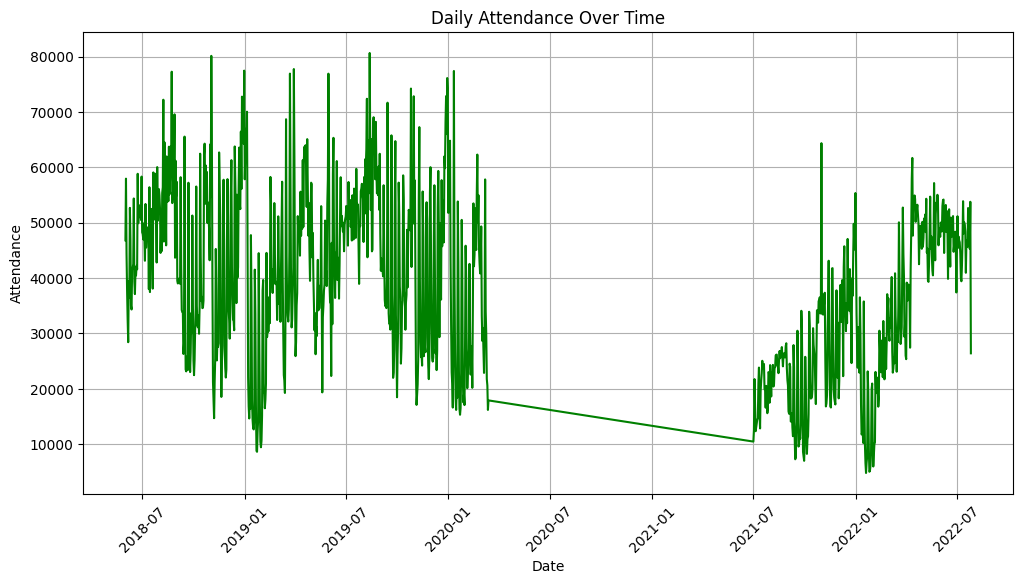

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=attendance["USAGE_DATE"], y=attendance["attendance"], color='green')

plt.xlabel("Date")
plt.ylabel("Attendance")
plt.title("Daily Attendance Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Weekly Attendance Over Time without the Covid Period

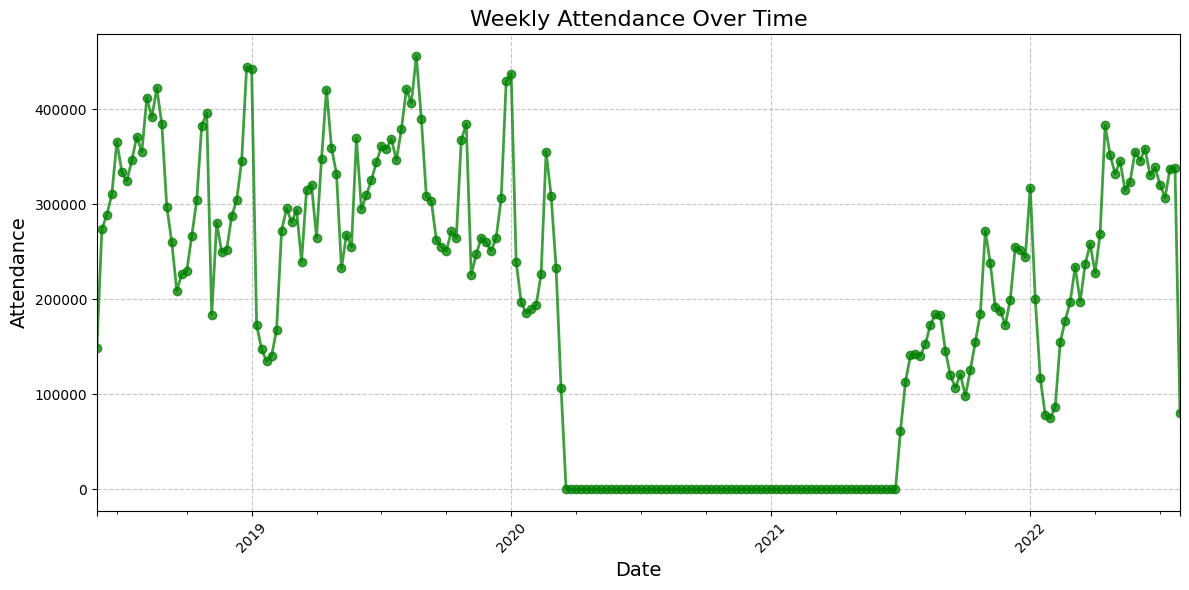

In [ ]:
weekly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="W"))["attendance"].sum()

plt.figure(figsize=(12, 6))
weekly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75, color='green')
plt.title("Weekly Attendance Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Monthly Attendance Over Time without the Covid Period

<ipython-input-6-4728a93c8cea>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))["attendance"].sum()


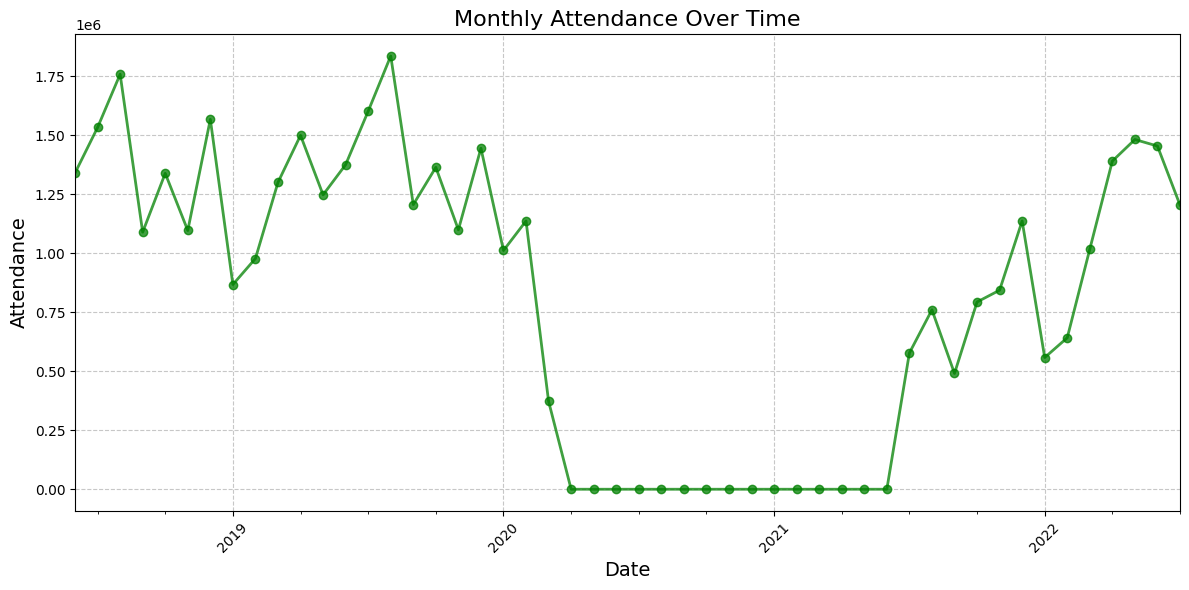

In [ ]:
monthly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))["attendance"].sum()

plt.figure(figsize=(12, 6))
monthly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75, color= 'green')
plt.title("Monthly Attendance Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**2. Impact of Covid on Attendance**

In [ ]:
#Defining COVID period
start_covid = '2020-03-14'
end_covid = '2021-06-30'

attendance_pre_covid = attendance[attendance['USAGE_DATE'] < start_covid]
attendance_post_covid = attendance[attendance['USAGE_DATE'] > end_covid]

Average Monthly Attendance Pre and Post Covid Period

<ipython-input-8-1eeff39e97ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['USAGE_DATE'].dt.month
<ipython-input-8-1eeff39e97ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['USAGE_DATE'].dt.month


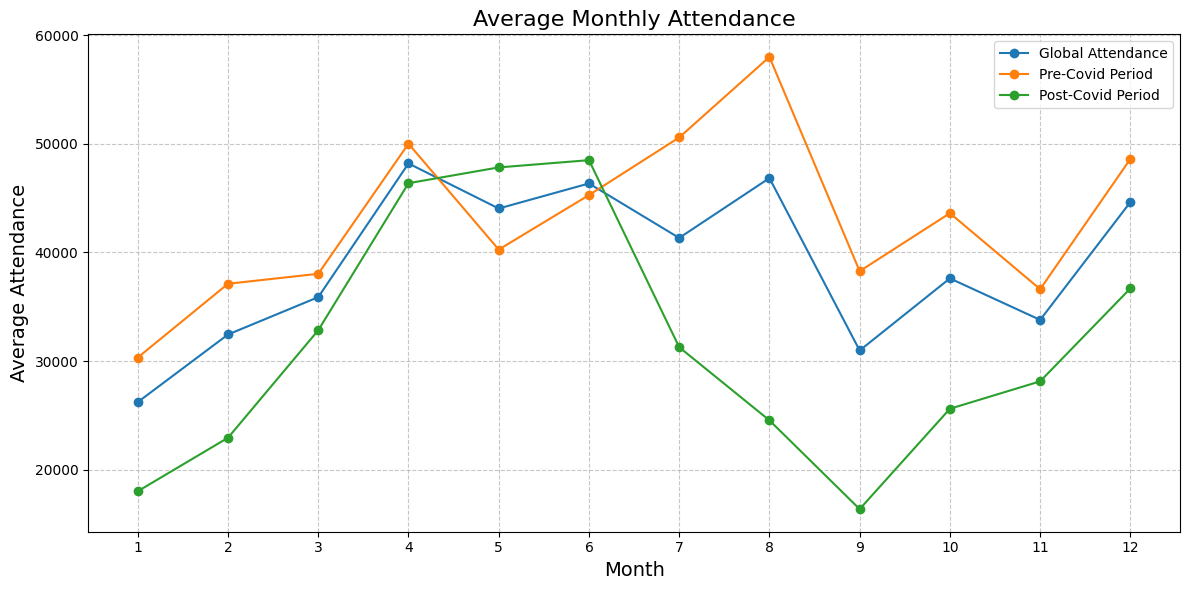

In [ ]:
# First, adding columns for each months
for data in [attendance, attendance_pre_covid, attendance_post_covid]:
  data['Month'] = data['USAGE_DATE'].dt.month

monthly_attendance_avg = {
    'Global Attendance': attendance.groupby('Month')['attendance'].mean(),
    'Pre-Covid Period': attendance_pre_covid.groupby('Month')['attendance'].mean(),
    'Post-Covid Period': attendance_post_covid.groupby('Month')['attendance'].mean()
}

# Plotting the average monthly attendance
plt.figure(figsize=(12, 6))
for label, series in monthly_attendance_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Monthly Attendance", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

Average Attendance Pre and Post Covid Period by Week Day

<ipython-input-9-2cef0c032764>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()
<ipython-input-9-2cef0c032764>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()


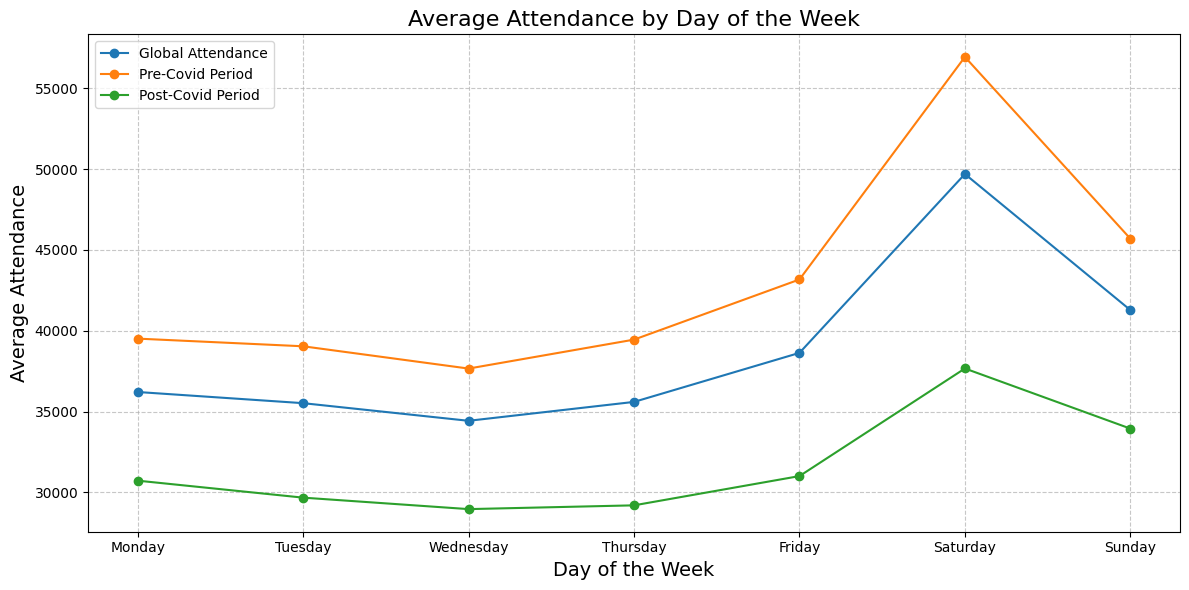

In [ ]:
#First, adding columns for each days
for data in [attendance, attendance_pre_covid, attendance_post_covid]:
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()

day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

daily_attendance_avg = {
    label: series.groupby(series.index).mean().reindex(day_order)
    for label, series in {
        "Global Attendance": attendance.groupby('WeekDay')["attendance"].mean(),
        "Pre-Covid Period": attendance_pre_covid.groupby('WeekDay')["attendance"].mean(),
        "Post-Covid Period": attendance_post_covid.groupby('WeekDay')["attendance"].mean(),
    }.items()
}

#Plotting the average daily attendance
plt.figure(figsize=(12, 6))
for label, series in daily_attendance_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Attendance by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**3. Waiting Time Analysis**

In [ ]:
waiting['WORK_DATE'] = pd.to_datetime(waiting['WORK_DATE'])

In [ ]:
waiting['DEB_TIME'] = pd.to_datetime(waiting['DEB_TIME'])
waiting['TIME'] = waiting['DEB_TIME'].dt.floor('H')

df_mean = waiting.groupby('TIME').agg(
    {
        'WAIT_TIME_MAX':'mean',
        'GUEST_CARRIED':'mean'
    }
)

<ipython-input-11-3f80cb85b4c6>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  waiting['TIME'] = waiting['DEB_TIME'].dt.floor('H')


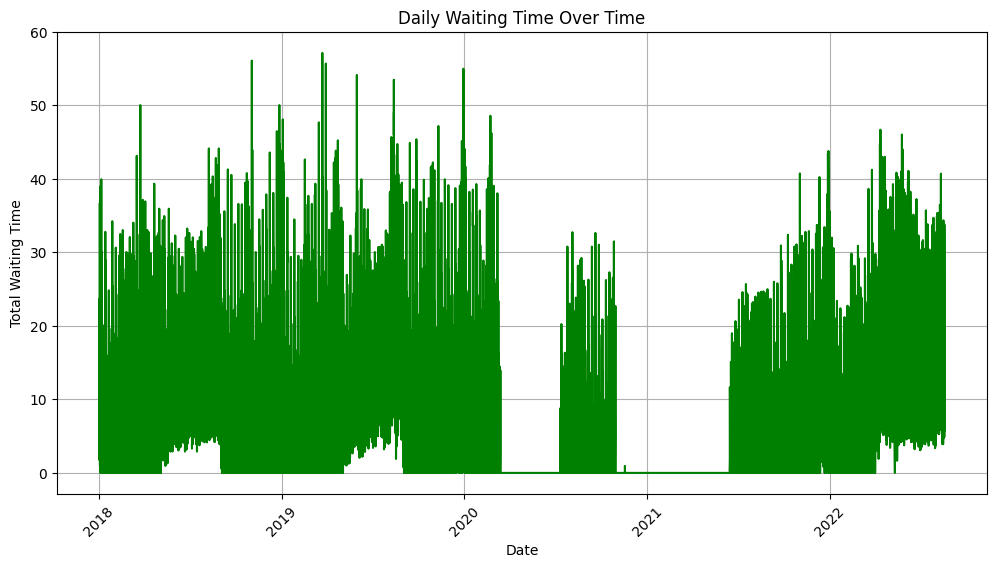

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_mean.index, y=df_mean["WAIT_TIME_MAX"], color='green')

plt.xlabel("Date")
plt.ylabel("Total Waiting Time")
plt.title("Daily Waiting Time Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

<ipython-input-13-afd8a59dbf71>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_waiting = waiting.groupby(pd.Grouper(key="WORK_DATE", freq="m"))["WAIT_TIME_MAX"].mean()


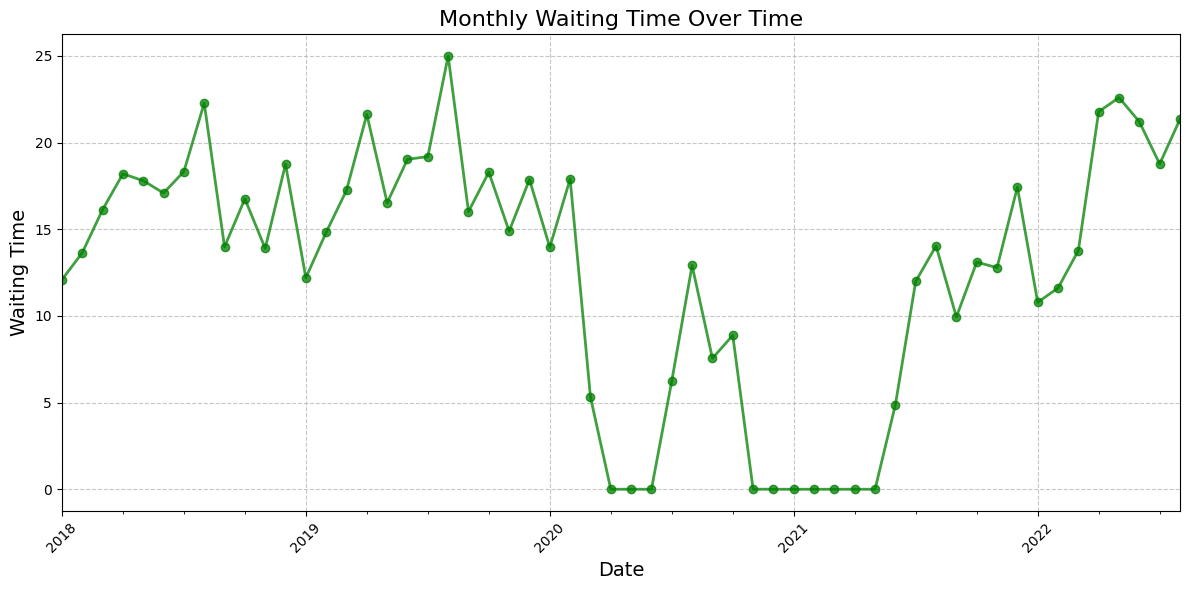

In [ ]:
monthly_waiting = waiting.groupby(pd.Grouper(key="WORK_DATE", freq="m"))["WAIT_TIME_MAX"].mean()

plt.figure(figsize=(12, 6))
monthly_waiting.plot(kind="line", marker="o", linewidth=2, alpha=0.75, color= 'green')
plt.title("Monthly Waiting Time Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Waiting Time", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Comparing Pre and Post Covid Period

In [ ]:
waiting_time_pre_covid = waiting[waiting['WORK_DATE'] < start_covid]
waiting_time_post_covid = waiting[waiting['WORK_DATE'] > end_covid]

<ipython-input-15-5df0c202c14c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['WORK_DATE'].dt.month
<ipython-input-15-5df0c202c14c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['WORK_DATE'].dt.month


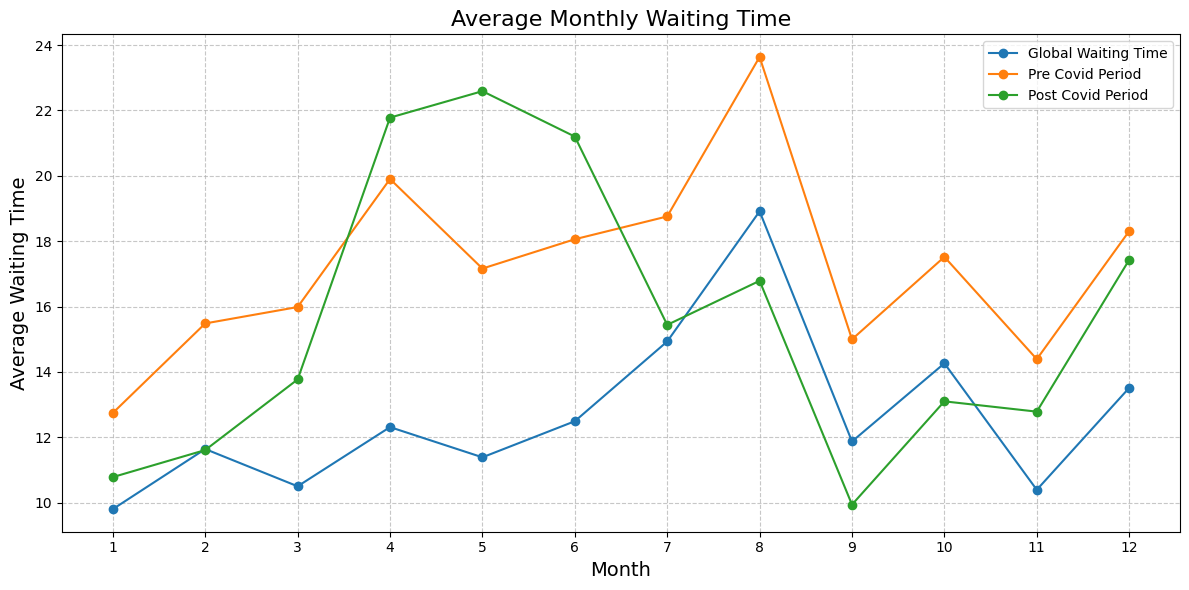

In [ ]:
# First, adding columns for each months
for data in [waiting, waiting_time_pre_covid, waiting_time_post_covid]:
  data['Month'] = data['WORK_DATE'].dt.month

monthly_waiting_time_avg = {
    'Global Waiting Time': waiting.groupby('Month')['WAIT_TIME_MAX'].mean(),
    'Pre Covid Period': waiting_time_pre_covid.groupby('Month')['WAIT_TIME_MAX'].mean(),
    'Post Covid Period': waiting_time_post_covid.groupby('Month')['WAIT_TIME_MAX'].mean()
}

# Plotting the average monthly waiting time
plt.figure(figsize=(12, 6))
for label, series in monthly_waiting_time_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Monthly Waiting Time", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Waiting Time", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

<ipython-input-16-29c0654ab453>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['WORK_DATE'].dt.day_name()
<ipython-input-16-29c0654ab453>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['WORK_DATE'].dt.day_name()


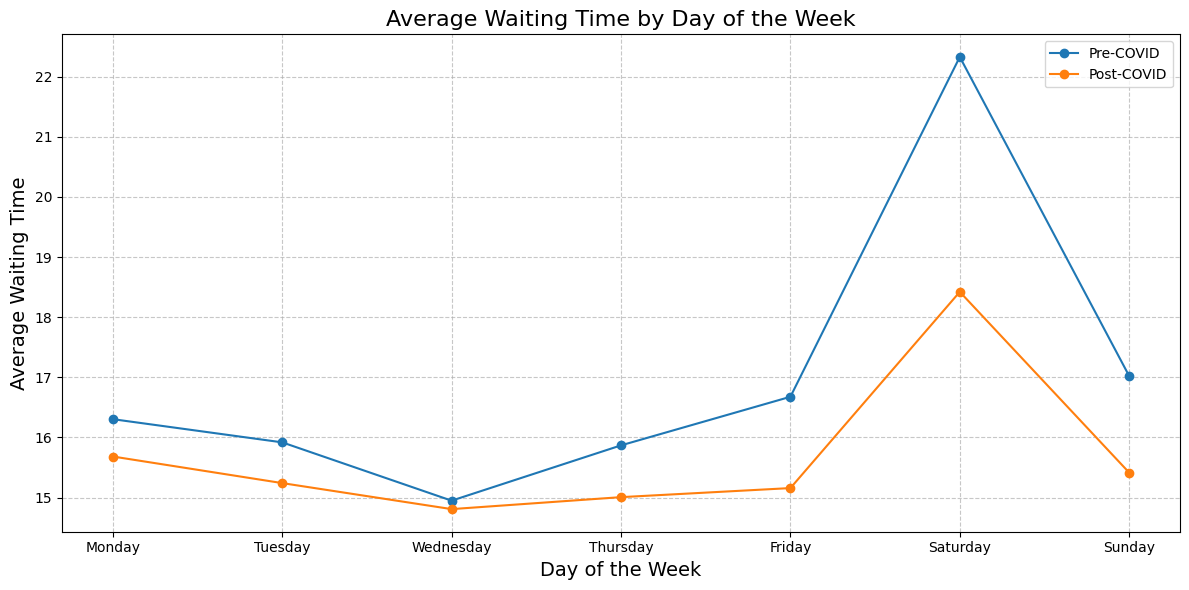

In [ ]:
#Computing average daily attendance
#First, adding columns for each days
for data in [waiting_time_pre_covid, waiting_time_post_covid]:
  data['WeekDay'] = data['WORK_DATE'].dt.day_name()

day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

daily_waiting_time_avg = {
    label: series.groupby(series.index).mean().reindex(day_order)
    for label, series in {
        "Pre-COVID": waiting_time_pre_covid.groupby('WeekDay')["WAIT_TIME_MAX"].mean(),
        "Post-COVID": waiting_time_post_covid.groupby('WeekDay')["WAIT_TIME_MAX"].mean(),
    }.items()
}

#Plotting the average daily attendance
plt.figure(figsize=(12, 6))
for label, series in daily_waiting_time_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Waiting Time by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Waiting Time", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**4. Weather Analysis on Attendance and Waiting Time**

In [ ]:
weather['Time'] = pd.to_datetime(weather['date'])
weather['date'] = pd.to_datetime(weather['date'].str.split(' ').str[0])

weather = weather[['date', 'Time', 'temp', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main']]

In [ ]:
# Computing daily weather
avg_weather = weather.groupby('date').agg(
    {'temp': 'mean',
     'humidity': 'mean',
     'wind_speed': 'mean',
     'rain_1h': 'sum',
     'snow_1h': 'sum',
     'clouds_all': 'sum'})

In [ ]:
weather_attendance = attendance.merge(avg_weather, how='left', left_on='USAGE_DATE', right_on='date')

            attendance      temp  humidity  wind_speed   rain_1h   snow_1h  \
attendance    1.000000  0.178566 -0.096301    0.008133  0.031238 -0.101578   
temp          0.178566  1.000000 -0.256667    0.424979  0.311244 -0.250443   
humidity     -0.096301 -0.256667  1.000000   -0.138968  0.188927  0.028899   
wind_speed    0.008133  0.424979 -0.138968    1.000000  0.472488 -0.017076   
rain_1h       0.031238  0.311244  0.188927    0.472488  1.000000 -0.046247   
snow_1h      -0.101578 -0.250443  0.028899   -0.017076 -0.046247  1.000000   
clouds_all    0.008659  0.161967  0.521955    0.238725  0.372562  0.094869   

            clouds_all  
attendance    0.008659  
temp          0.161967  
humidity      0.521955  
wind_speed    0.238725  
rain_1h       0.372562  
snow_1h       0.094869  
clouds_all    1.000000  


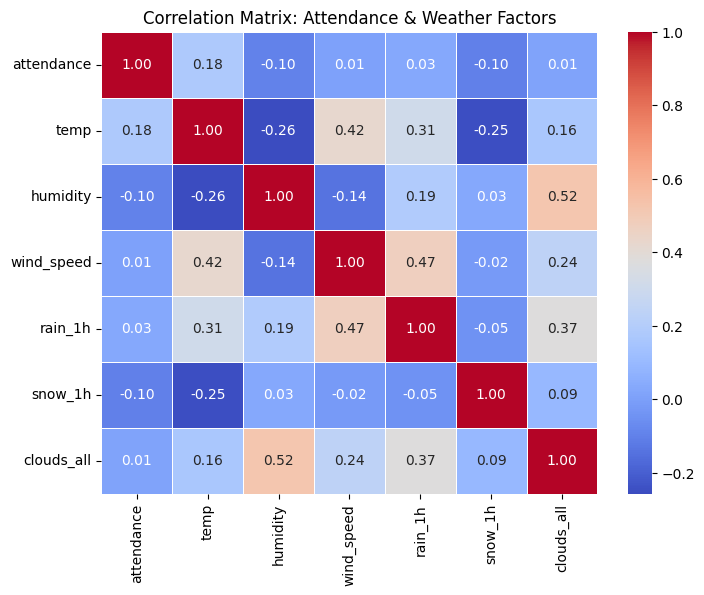

In [ ]:
corr_matrix = weather_attendance[['attendance','temp','humidity','wind_speed','rain_1h', 'snow_1h', 'clouds_all']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Attendance & Weather Factors")
plt.show()

In [ ]:
# Computing daily weather by hour
avg_weather_hourly = weather.groupby('Time').agg(
    {'temp': 'mean',
     'humidity': 'mean',
     'wind_speed': 'mean',
     'rain_1h': 'sum',
     'snow_1h': 'sum',
     'clouds_all': 'sum'})

# Computing daily total attendance by hour
df_sum = waiting.groupby('TIME').agg(
    {
        'WAIT_TIME_MAX':'sum',
        'GUEST_CARRIED':'sum'
    }
)

               GUEST_CARRIED      temp  humidity  wind_speed   rain_1h  \
GUEST_CARRIED       1.000000  0.127742 -0.114786    0.054926 -0.000826   
temp                0.127742  1.000000 -0.321392    0.221242  0.088492   
humidity           -0.114786 -0.321392  1.000000   -0.086851  0.168544   
wind_speed          0.054926  0.221242 -0.086851    1.000000  0.272208   
rain_1h            -0.000826  0.088492  0.168544    0.272208  1.000000   
snow_1h            -0.027244 -0.144089  0.054734    0.030481 -0.026931   
clouds_all          0.057473 -0.000155  0.414623    0.173980  0.208695   

                snow_1h  clouds_all  
GUEST_CARRIED -0.027244    0.057473  
temp          -0.144089   -0.000155  
humidity       0.054734    0.414623  
wind_speed     0.030481    0.173980  
rain_1h       -0.026931    0.208695  
snow_1h        1.000000    0.064995  
clouds_all     0.064995    1.000000  


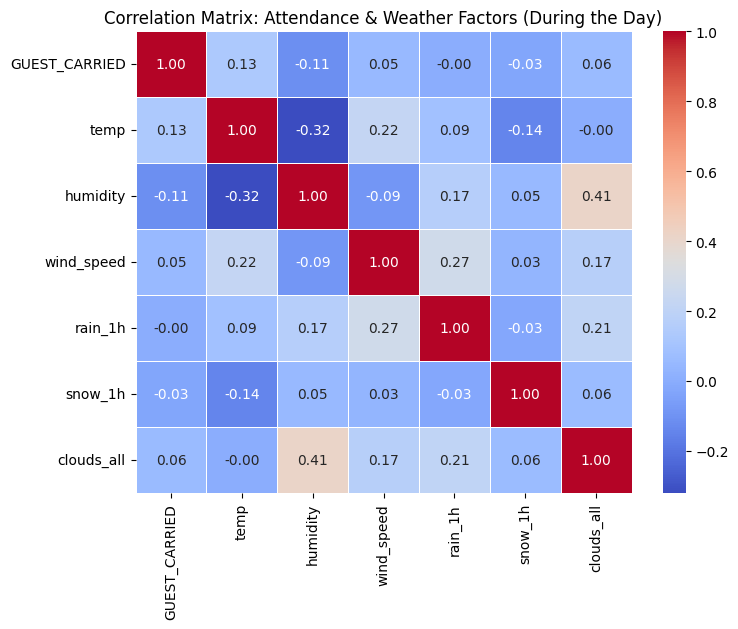

In [ ]:
weather_attendance_hourly = df_sum.merge(avg_weather_hourly, how='left', left_on='TIME', right_on='Time')

corr_matrix_hourly = weather_attendance_hourly[['GUEST_CARRIED','temp','humidity','wind_speed','rain_1h', 'snow_1h', 'clouds_all']].corr()
print(corr_matrix_hourly)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_hourly, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Attendance & Weather Factors (During the Day)")
plt.show()

**5. Analysis of Capacity vs. Waiting Time**

This analysis will give us insights on the attractions reaching their maximum capacity and generating long queue for customers.

In [46]:
# Computing the waiting time for each attraction
df = waiting.groupby('ENTITY_DESCRIPTION_SHORT').agg(
    {
        'GUEST_CARRIED':'sum',
        'ADJUST_CAPACITY':'sum',
        'WAIT_TIME_MAX':'mean'
    }
)

# Computing a ratio of number of guest and capacity
df['Ratio People/Capacity'] = df['GUEST_CARRIED'] / df['ADJUST_CAPACITY']

<ipython-input-24-6583f8de5fb6>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]


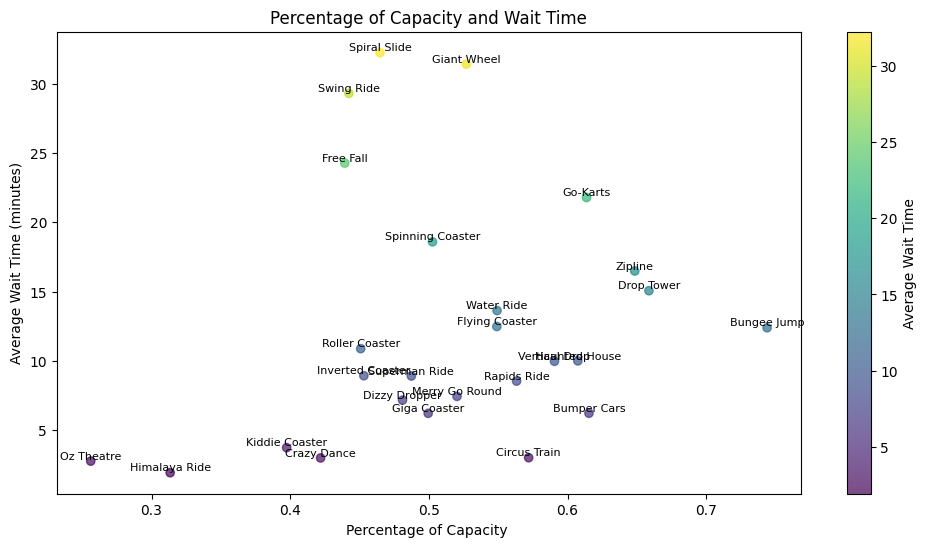

In [ ]:
ratio_people_capacity = df['Ratio People/Capacity']
attractions_name = df.index
wait_time = df['WAIT_TIME_MAX']

plt.figure(figsize=(12,6))
scatter = plt.scatter(ratio_people_capacity, wait_time, c=wait_time, cmap='viridis', alpha=0.7)
plt.title('Percentage of Capacity and Wait Time')
plt.xlabel('Percentage of Capacity ')
plt.ylabel('Average Wait Time (minutes)')

cbar = plt.colorbar(scatter)
cbar.set_label('Average Wait Time')

texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]
plt.show()

<ipython-input-48-d57b4e04e598>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(guest_carried[i], capacity[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]


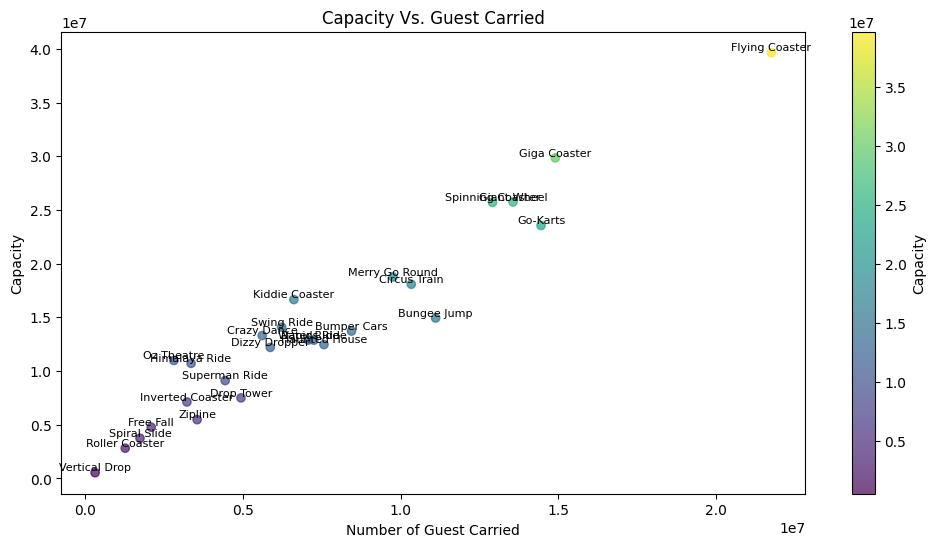

In [48]:
guest_carried = df['GUEST_CARRIED']
attractions_name = df.index
capacity = df['ADJUST_CAPACITY']

plt.figure(figsize=(12,6))
scatter2 = plt.scatter(guest_carried, capacity, c=capacity, cmap='viridis', alpha=0.7)
plt.title('Capacity Vs. Guest Carried')
plt.xlabel('Number of Guest Carried')
plt.ylabel('Capacity')

cbar = plt.colorbar(scatter2)
cbar.set_label('Capacity')

texts = [plt.text(guest_carried[i], capacity[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]
plt.show()

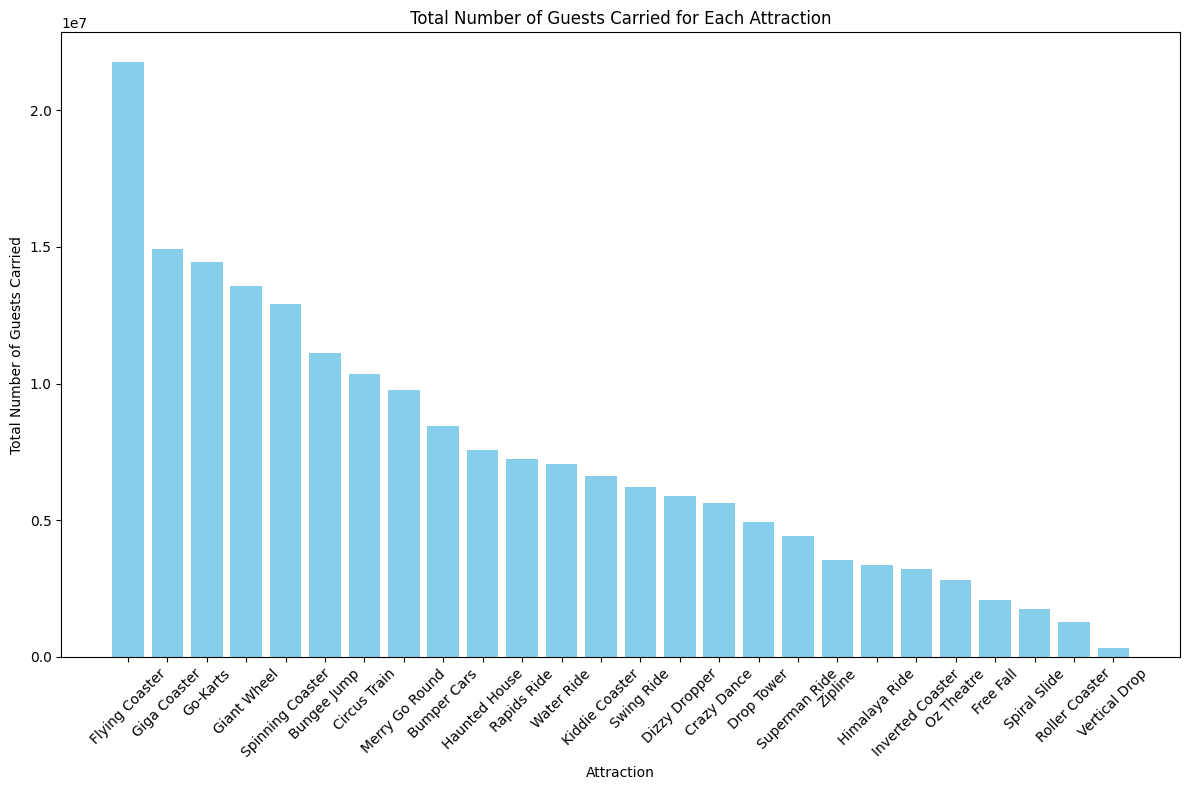

In [53]:
df.sort_values(by='GUEST_CARRIED', ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
plt.bar(df.index, df['GUEST_CARRIED'], color='skyblue')
plt.xlabel('Attraction')
plt.ylabel('Total Number of Guests Carried')
plt.title('Total Number of Guests Carried for Each Attraction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# Rides that don't reach their max capacity but still have long wait
flop_wait = ['Spiral Slide', 'Swing Ride', 'Giant Wheel', 'Free Fall', 'Go-Karts', 'Spinning Coaster']

# Rides that, for the same ratio of capacity, have little waiting time
top_wait = ['Roller Coaster', 'Flying Coaster', 'Rapids Ride', 'Dizzy Dropper', 'Merry Go Round', 'Giga Coaster','Inverted Coaster', 'Superman Ride','Vertical Drop', 'Haunted House']

<ipython-input-79-d830d4e4b4d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='GUEST_CARRIED', ascending=False, inplace=True)
<ipython-input-79-d830d4e4b4d8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Color'] = filtered_df['ENTITY_DESCRIPTION_SHORT'].apply(


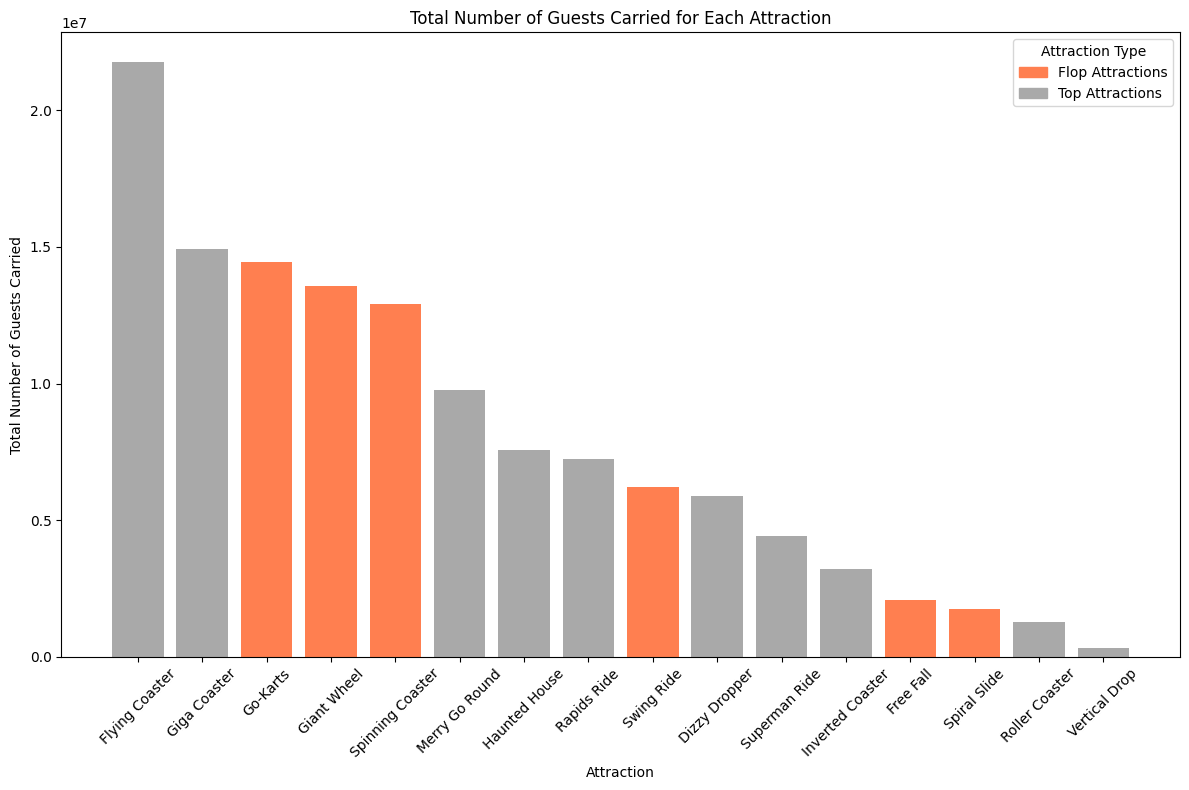

In [79]:
import matplotlib.patches as mpatches

filtered_df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(flop_wait + top_wait)]

# Sort the filtered DataFrame by 'GUEST_CARRIED'
filtered_df.sort_values(by='GUEST_CARRIED', ascending=False, inplace=True)

# Define color palette for flop and top attractions
flop_color = 'coral'
top_color = 'darkgray'

# Create a list of colors based on the attraction category
filtered_df['Color'] = filtered_df['ENTITY_DESCRIPTION_SHORT'].apply(
    lambda x: flop_color if x in flop_wait else top_color
)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['ENTITY_DESCRIPTION_SHORT'], filtered_df['GUEST_CARRIED'], color=filtered_df['Color'])

# Add labels and title
plt.xlabel('Attraction')
plt.ylabel('Total Number of Guests Carried')
plt.title('Total Number of Guests Carried for Each Attraction')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
flop_patch = mpatches.Patch(color=flop_color, label='Flop Attractions')
top_patch = mpatches.Patch(color=top_color, label='Top Attractions')
plt.legend(handles=[flop_patch, top_patch], title="Attraction Type")

# Show the plot
plt.show()


For this analysis, we selected only data from 2022 since we want the most recent insights.

In [82]:
rides_analysis = waiting[waiting['WORK_DATE'] >= '2022-01-01']
rides_analysis = rides_analysis.groupby('ENTITY_DESCRIPTION_SHORT').agg(
    {
        'GUEST_CARRIED':'sum',
        'ADJUST_CAPACITY':'sum',
        'WAIT_TIME_MAX':'mean'
    }
)

# Computing a ratio of number of guest and capacity
rides_analysis['Ratio People/Capacity'] = rides_analysis['GUEST_CARRIED'] / rides_analysis['ADJUST_CAPACITY']

<ipython-input-85-5ac891a52ec5>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]


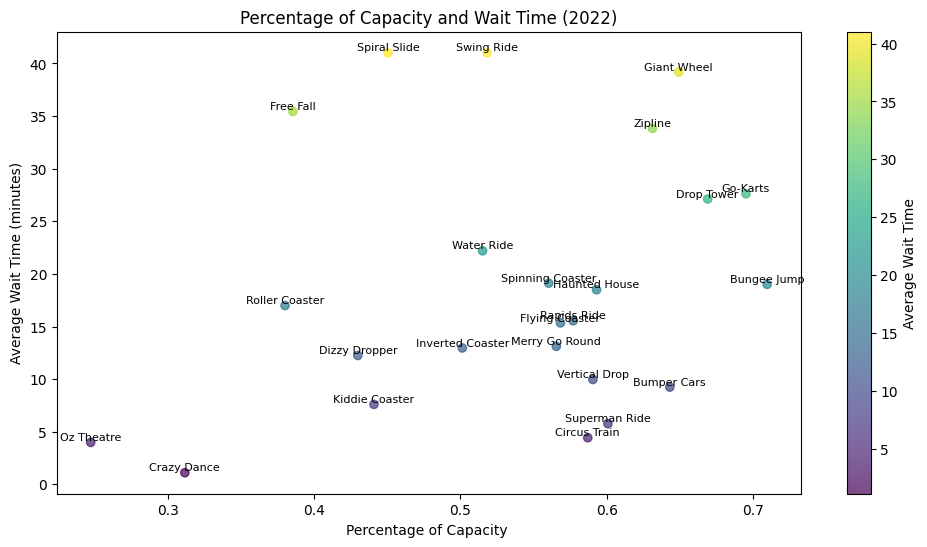

In [85]:
ratio_people_capacity = rides_analysis['Ratio People/Capacity']
attractions_name = rides_analysis.index
wait_time = rides_analysis['WAIT_TIME_MAX']

plt.figure(figsize=(12,6))
scatter = plt.scatter(ratio_people_capacity, wait_time, c=wait_time, cmap='viridis', alpha=0.7)
plt.title('Percentage of Capacity and Wait Time (2022)')
plt.xlabel('Percentage of Capacity ')
plt.ylabel('Average Wait Time (minutes)')

cbar = plt.colorbar(scatter)
cbar.set_label('Average Wait Time')

texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attractions_name)]
plt.show()

In [91]:
# Rides that don't reach their max capacity but still have long wait
flop_wait2 = ['Spiral Slide', 'Swing Ride', 'Giant Wheel', 'Free Fall', 'Go-Karts', 'Zipline', 'Drop Tower']

# Rides that, for the same ratio of capacity, have little waiting time
top_wait2 = []
for index, row in rides_analysis.iterrows():
    if row["Ratio People/Capacity"] < 0.6 and row["WAIT_TIME_MAX"] < 25:
        top_wait2.append(index)

<ipython-input-94-67dbad130e80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='GUEST_CARRIED', ascending=False, inplace=True)
<ipython-input-94-67dbad130e80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Color'] = filtered_df['ENTITY_DESCRIPTION_SHORT'].apply(


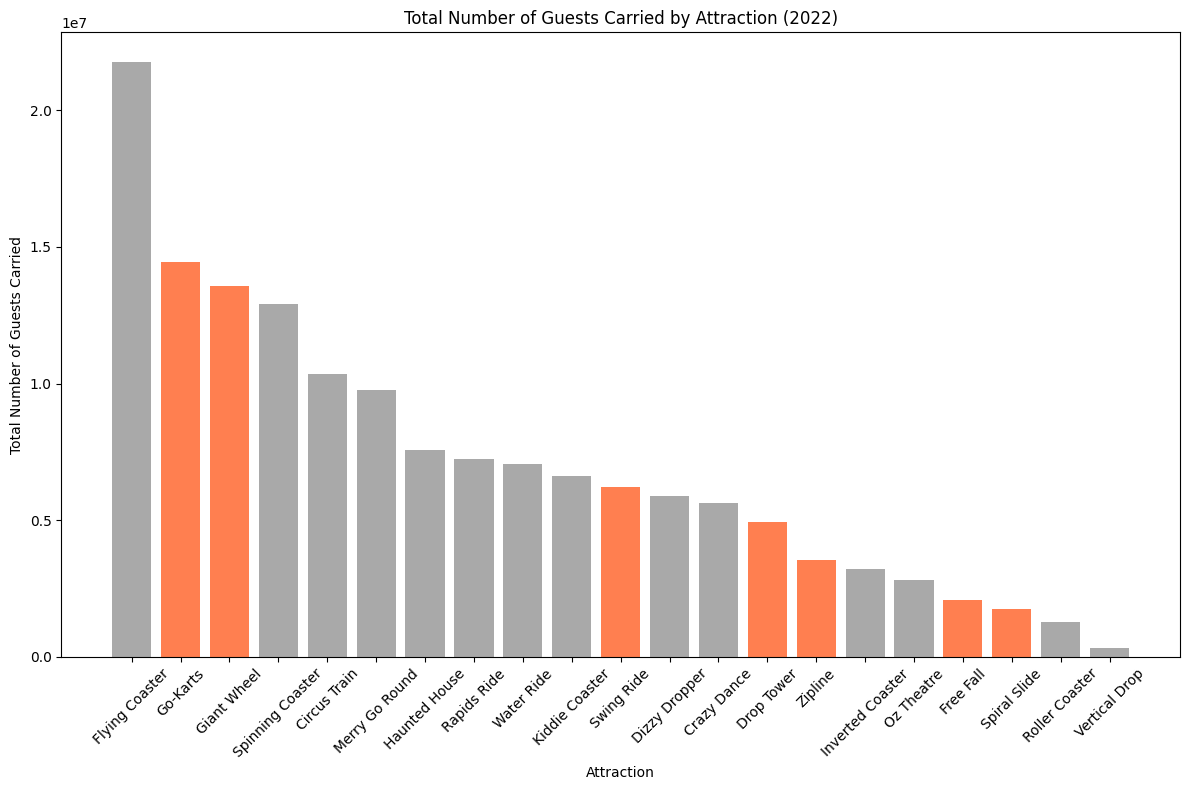

In [94]:
import matplotlib.patches as mpatches

filtered_df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(flop_wait2 + top_wait2)]

# Sort the filtered DataFrame by 'GUEST_CARRIED'
filtered_df.sort_values(by='GUEST_CARRIED', ascending=False, inplace=True)

# Define color palette for flop and top attractions
flop_color = 'coral'
top_color = 'darkgray'

# Create a list of colors based on the attraction category
filtered_df['Color'] = filtered_df['ENTITY_DESCRIPTION_SHORT'].apply(
    lambda x: flop_color if x in flop_wait2 else top_color
)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['ENTITY_DESCRIPTION_SHORT'], filtered_df['GUEST_CARRIED'], color=filtered_df['Color'])

# Add labels and title
plt.xlabel('Attraction')
plt.ylabel('Total Number of Guests Carried')
plt.title('Total Number of Guests Carried by Attraction (2022)')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
flop_patch = mpatches.Patch(color=flop_color, label='Flop Attractions')
top_patch = mpatches.Patch(color=top_color, label='Top Attractions')

# Show the plot
plt.show()
